In [313]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as col
import numpy as np

In [415]:
def plot_data_pdf(parameter='TS80m'):

  """" Plot probability distribution function of data
  parameter: str of parameter (column) from dataframe.
  
  Outputs density plot of triple cation and MAPI devices."""

  triplecat_x = np.log(data[data.Perovskite_composition_short_form == 'CsFAMAPbBrI'][parameter])
  mapi_x = np.log(data[data.Perovskite_composition_short_form == 'MAPbI'][parameter])
  triplecat_x = triplecat_x[~triplecat_x.isna()]
  mapi_x = mapi_x[~mapi_x.isna()]
  triplecat_pdf = stats.norm.pdf(triplecat_x.sort_values(), triplecat_x.mean(), triplecat_x.std())
  mapi_pdf = stats.norm.pdf(mapi_x.sort_values(), mapi_x.mean(), mapi_x.std())
  fig, ax = plt.subplots()
  ax.plot(mapi_x.sort_values(), mapi_pdf, label='mapi', color = UoS_red)
  ax.plot(triplecat_x.sort_values(), triplecat_pdf, label='3cat', color = UoS_rgb)
  ax.fill_between(triplecat_x.sort_values(), triplecat_pdf, color = ([0/255, 89/255, 143/255, 0.3]))
  ax.fill_between(mapi_x.sort_values(), mapi_pdf, color = ([255/255, 99/255, 113/255, 0.3]))
  ax.legend()


def calculate_ttest_pval(parameter='TS80m', test_type='two-sided'):
   
  """" Calculate independent student's t-test of triple cation and MAPI device populations.

  parameter: str of parameter (column) from dataframe.
  test_type: str of t-test type (less, greater, two-sided).

  Outputs t-statistic, p-value, and the ratio of the natural logarithm-transformed means."""
    
  triplecat_x = np.log(data[data.Perovskite_composition_short_form == 'CsFAMAPbBrI'][parameter])
  mapi_x = np.log(data[data.Perovskite_composition_short_form == 'MAPbI'][parameter])
  triplecat_x = triplecat_x[~triplecat_x.isna()]
  mapi_x = mapi_x[~mapi_x.isna()]
  if np.var(triplecat_x)/np.var(mapi_x) < 4:
    tstat, pval = stats.ttest_ind(triplecat_x, mapi_x, alternative = test_type, equal_var=True)
  else:
    tstat, pval = stats.ttest_ind(triplecat_x, mapi_x, alternative = test_type, equal_var=False)
  if pval < 0.05:
    mean_ratio = triplecat_x.mean() / mapi_x.mean()
  else:
    mean_ratio = 'There is no statistically significant difference in the population means'
  return tstat, pval, mean_ratio


def plot_and_calc_pval(parameter='TS80m', test_type='two-sided'):
    """" Calls functions to plot the PDF and calculate the independent t-test for the chosen parameter..

    parameter: str of parameter (column) from dataframe.
    test_type: str of t-test type (less, greater, two-sided).

    Outputs t-statistic, p-value, and the ratio of the natural logarithm-transformed means, and the PDF plot."""

    plot_data_pdf(parameter)
    tstat, pval, mean_ratio = calculate_ttest_pval(parameter, test_type)
    return tstat, pval, mean_ratio


def save_data_to_excel(parameter):

  """" Function to make Elena's life easier and output the triple cation and MAPI device seperated parameter data to a .csv.
  parameter: str of parameter (column) from dataframe.

  Outputs .csvs of triple cation and MAPI data for the specified parameter"""

  triplecat = data[data.Perovskite_composition_short_form == 'CsFAMAPbBrI'][parameter]
  mapi = data[data.Perovskite_composition_short_form == 'MAPbI'][parameter]
  triplecat.to_csv(path_or_buf = r'c:\Users\Elena\Documents\GitHub\PRL-stability-comparison' + r'\triplecat_' + parameter + '.csv', index=False)
  mapi.to_csv(path_or_buf = r'c:\Users\Elena\Documents\GitHub\PRL-stability-comparison' + r'\mapi_' + parameter + '.csv', index=False)


list_colors = [(0.9686274509803922, 0.9882352941176471, 0.9882352941176471, 1.0),
               (0/255, 89/255, 143/255, 1.0)]

UoS = col.LinearSegmentedColormap.from_list('UoS', colors=list_colors)

UoS_red = [255/255, 99/255, 113/255]
UoS_rgb = [0/255, 89/255, 143/255]
UoS_rgb_low_alpha = [0/255, 89/255, 143/255, 0.05]

In [418]:
x = save_data_to_excel('TS80m')

In [315]:
data = pd.read_csv('datam.csv',  low_memory = False)
data = data[data.Perovskite_composition_short_form.isin(['MAPbI','CsFAMAPbBrI'])]
data = data[data.Encapsulation == False]
data = data.copy()

In [316]:
data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 4409 entries, 0 to 7415
Data columns (total 414 columns):
 #    Column                                                           Non-Null Count  Dtype  
---   ------                                                           --------------  -----  
 0    Ref_ID                                                           4409 non-null   int64  
 1    Ref_ID_temp                                                      4409 non-null   int64  
 2    Ref_name_of_person_entering_the_data                             4409 non-null   object 
 3    Ref_data_entered_by_author                                       4409 non-null   bool   
 4    Ref_DOI_number                                                   4409 non-null   object 
 5    Ref_lead_author                                                  4409 non-null   object 
 6    Ref_publication_date                                             4409 non-null   object 
 7    Ref_journal                         

In [317]:
data.TS80m.isna().value_counts()

TS80m
False    3938
True      471
Name: count, dtype: int64

In [318]:
data = data[~data.TS80m.isna()]
data.TS80m.isna().value_counts()

TS80m
False    3938
Name: count, dtype: int64

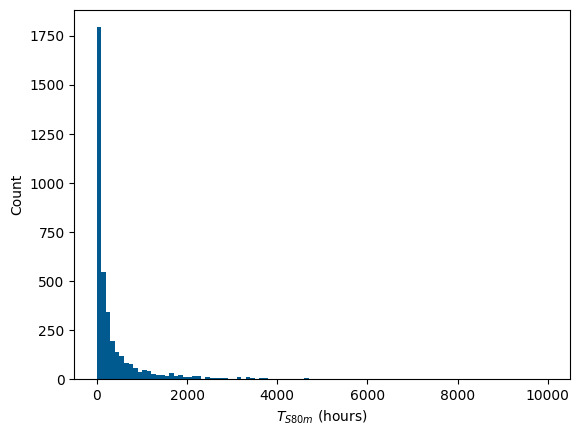

In [375]:
plt.hist(data.TS80m, bins=100, range=[0,10000], color = UoS_rgb)
plt.xlabel('$T_{S80m}$ (hours)')
plt.ylabel('Count')
plt.show()

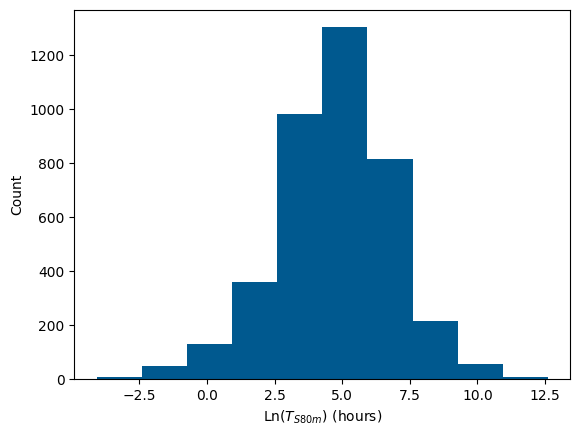

In [374]:
plt.hist(np.log(data.TS80m),)
plt.xlabel('Ln($T_{S80m}$) (hours)')
plt.ylabel('Count')
plt.show()

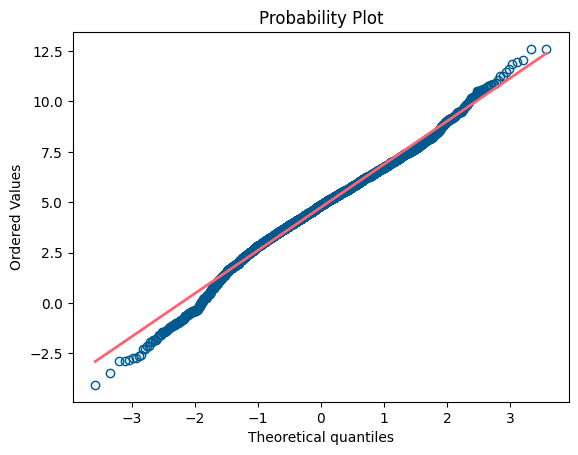

In [389]:
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(np.log(data.TS80m), dist="norm", plot=plt)
ax.get_lines()[0].set_markeredgecolor(UoS_rgb)
ax.get_lines()[0].set_markerfacecolor(UoS_rgb_low_alpha)
ax.get_lines()[1].set_color(UoS_red)
ax.get_lines()[1].set_linewidth(2)


plt.show()

(0.0, 0.2)

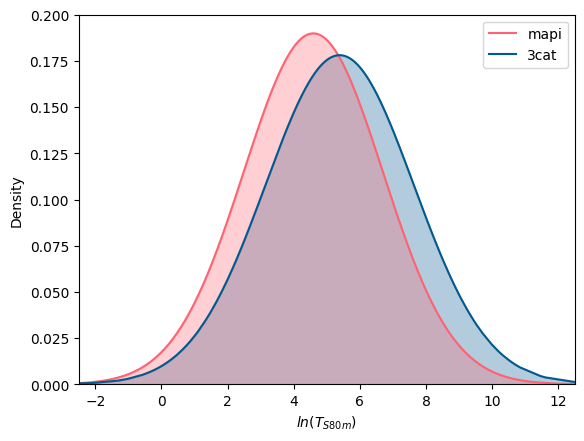

In [365]:
plot_and_calc_pval('TS80m', test_type='greater')
plt.xlabel('$ln(T_{S80m})$')
plt.ylabel('Density')
plt.xlim(-2.5, 12.5)
plt.ylim(0, 0.2)

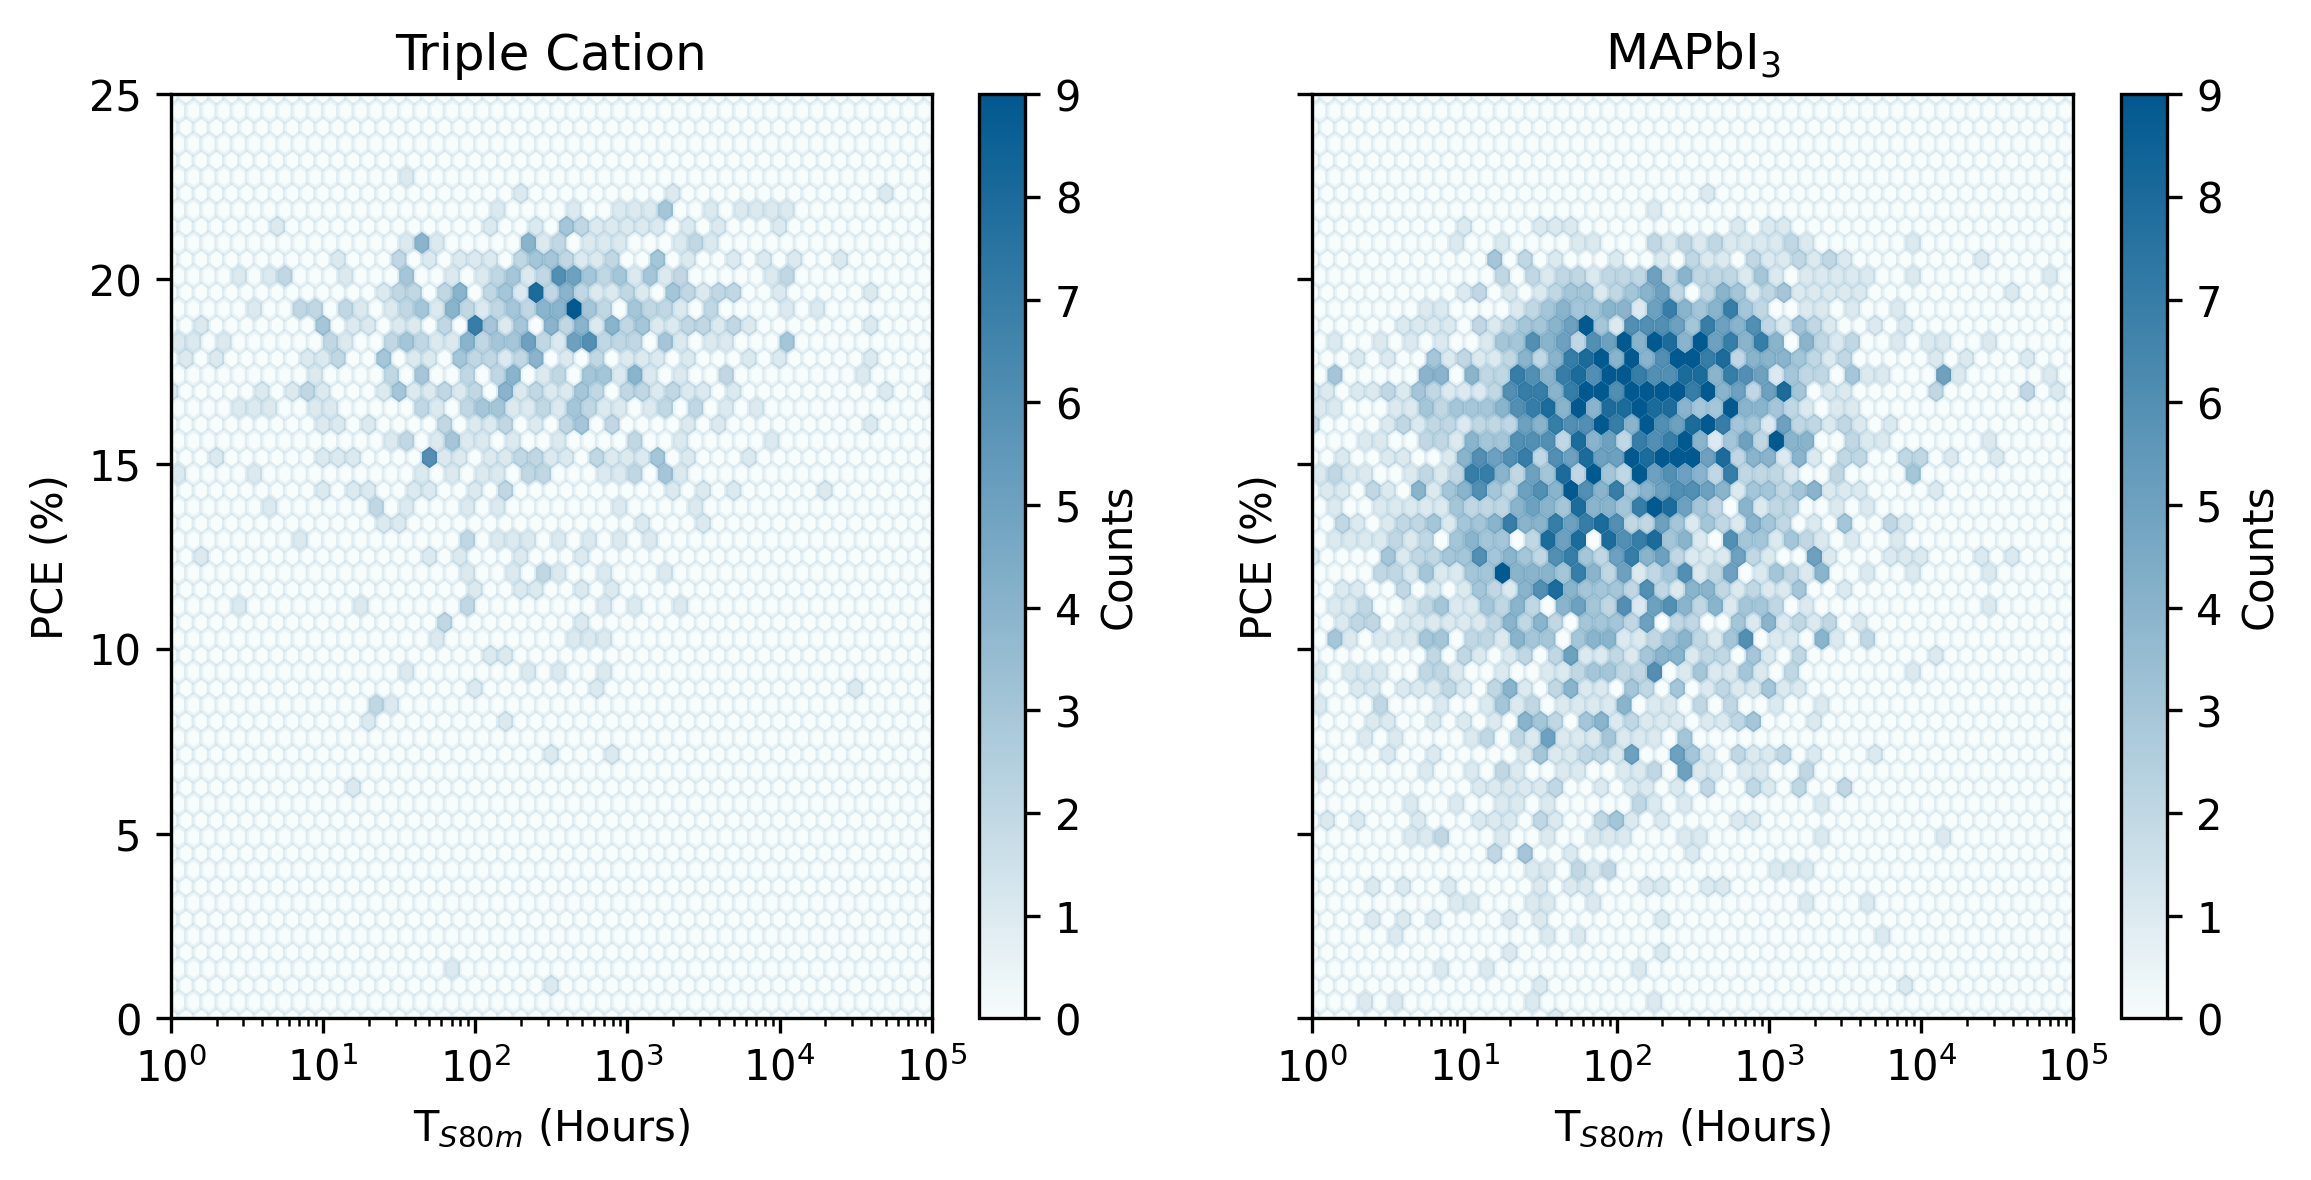

In [453]:
hex_y = data[data.Perovskite_composition_short_form == 'CsFAMAPbBrI']['JV_default_PCE']
hex_x = data[data.Perovskite_composition_short_form == 'CsFAMAPbBrI']['TS80m']

fig, ax = plt.subplots(ncols=2, sharey=True, figsize=[9,4], dpi=300)
hb0 = ax[0].hexbin(hex_x, hex_y, xscale='log', gridsize=50, cmap=UoS, extent=[0,5,0,25], edgecolors=UoS_rgb_low_alpha, vmin=0, vmax=9)
ax[0].set_ylim(0,25)
ax[0].set_xlim(1, 100000)
ax[0].set_ylabel('PCE (%)')
ax[0].set_xlabel('T$_{S80m}$ (Hours)')
ax[0].set_title('Triple Cation')
cb = fig.colorbar(hb0, ax=ax[0], label='Counts',)

hex_mapi_y = data[data.Perovskite_composition_short_form == 'MAPbI']['JV_default_PCE']
hex_mapi_x = data[data.Perovskite_composition_short_form == 'MAPbI']['TS80m']

hb1 = ax[1].hexbin(hex_mapi_x, hex_mapi_y, xscale='log', gridsize=50, extent=[0,5,0,25], cmap=UoS, edgecolors=UoS_rgb_low_alpha, vmin=0, vmax=9)
ax[1].set_ylim(0,25)
ax[1].set_xlim(1, 100000)
ax[1].set_title('MAPbI${_3}$')
ax[1].set_ylabel('PCE (%)')
ax[1].set_xlabel('T$_{S80m}$ (Hours)')
cb = fig.colorbar(hb1, ax=ax[1], label='Counts')

plt.show()
